In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("data-export (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [24]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channal group", "Datehour","users","session","Engaged sessions",	"Average engagement time per session",	"Engaged sessions per user",	"Events per session",	"Engagement rate","Event count"]

In [25]:
df.head()

,channal group,Datehour,users,session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [36]:
df["Datehour"] = pd.to_datetime(df["Datehour"], format ="%Y%m%d%H", errors ='coerce')
numeric_cols = df.columns.drop(['channal group','Datehour'])
df[numeric_cols]= df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df["hour"] = df["Datehour"].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channal group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   session                              3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hour        

In [37]:
df.describe()

,Datehour,users,session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#Session and Users over time

In [ ]:
sns.set(style="whitegrid")

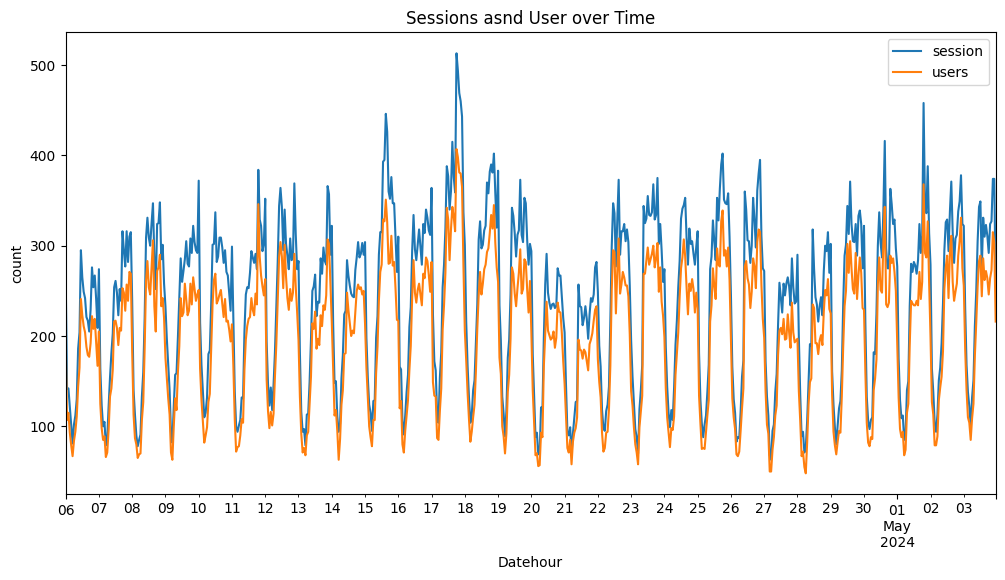

In [47]:
plt.figure(figsize=(12,6))
df.groupby("Datehour")[["session","users"]].sum().plot(ax=plt.gca())
plt.title("Sessions asnd User over Time")
plt.xlabel("Datehour")
plt.ylabel("count")
plt.show()

#Total Users by Channal

C:\Users\HP\AppData\Local\Temp\ipykernel_5736\176698409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channal group", y="users", estimator=np.sum, palette ="viridis")


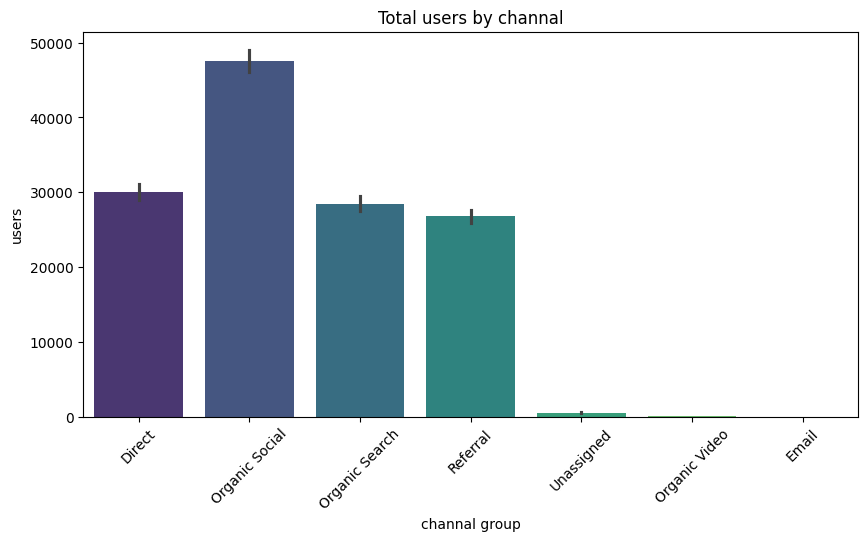

In [57]:

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="channal group", y="users", estimator=np.sum, palette ="viridis")
plt.title("Total users by channal")
plt.xticks(rotation=45)
plt.show()

In [58]:
df.head()


,channal group,Datehour,users,session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


#Average Engagment Time by Channal

C:\Users\HP\AppData\Local\Temp\ipykernel_5736\1109252926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channal group", y="Average engagement time per session", estimator=np.mean, palette ="magma")


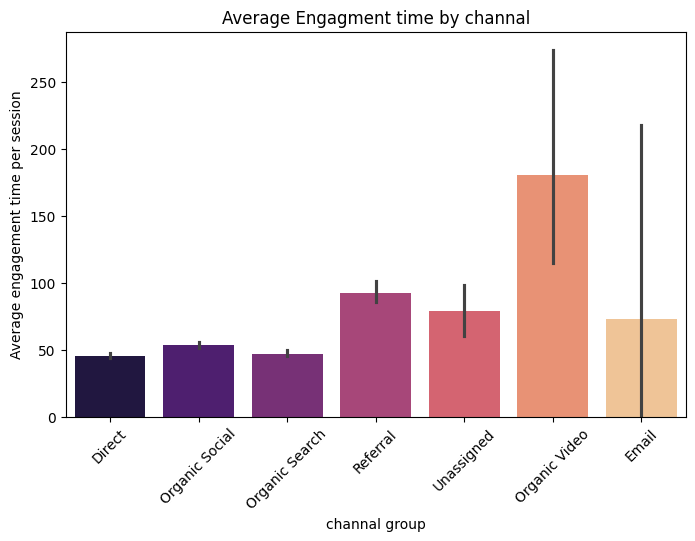

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channal group", y="Average engagement time per session", estimator=np.mean, palette ="magma")
plt.title("Average Engagment time by channal")
plt.xticks(rotation=45)
plt.show()
           

In [62]:
df.head()

,channal group,Datehour,users,session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


#Engagment rate distribution by channal

C:\Users\HP\AppData\Local\Temp\ipykernel_5736\1852375697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channal group", y="Engagement rate", estimator=np.mean, palette ="coolwarm")


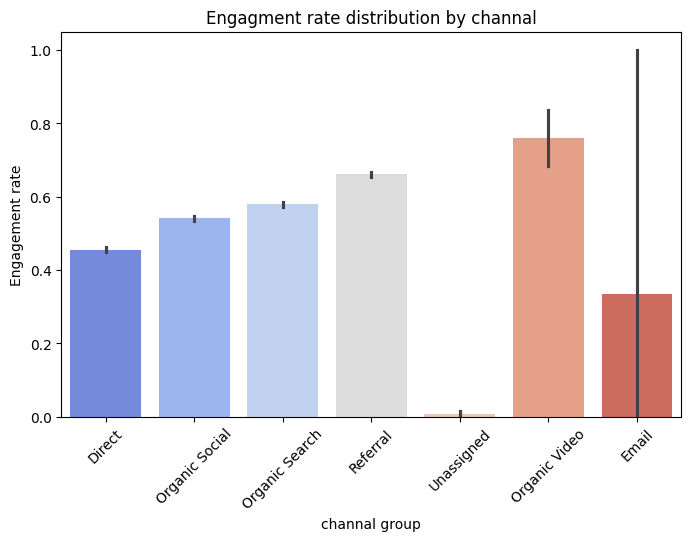

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channal group", y="Engagement rate", estimator=np.mean, palette ="coolwarm")
plt.title("Engagment rate distribution by channal")
plt.xticks(rotation=45)
plt.show()

#Engaged vs non engaged sessions

In [64]:
df.head()

,channal group,Datehour,users,session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


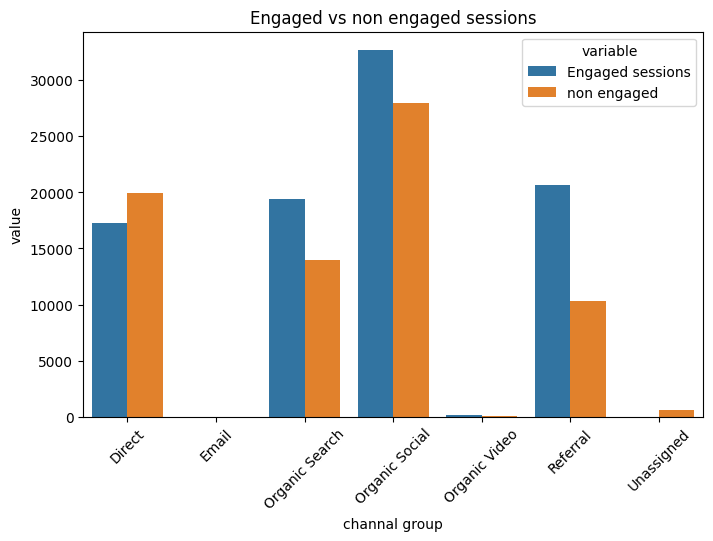

In [77]:
session_df = df.groupby("channal group")[["session", "Engaged sessions"]].sum().reset_index()
session_df["non engaged"] = session_df["session"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channal group", value_vars=["Engaged sessions", "non engaged"])
plt.figure(figsize=(8,5)) 
sns.barplot(data=session_df_melted, x="channal group", y="value", hue ="variable")
plt.title("Engaged vs non engaged sessions")
plt.xticks(rotation=45) 
plt.show()  



#traffic by hour and channal

In [80]:
heatmap_data =df.groupby(["hour","channal group"])["session"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6)) 
sns.heatmap(heatmap_data,cmap="Yellow", linewidths =.5, annot = True, fmt='0f')
plt.title("Traffic by hour and channal")
plt.xlabel("channal group")
plt.ylabel("hour by day")
plt.show()  


KeyError: "'Yellow' is not a known colormap name"

<Figure size 1200x600 with 0 Axes>